In [8]:
from typing import TypedDict, Literal

class User(TypedDict):
    name: str
    age: int

    summary: str

In [12]:
def age_increment(state: User):
    age = state["age"] + 1

    return {"age": age}

def adult(state: User):
    summary = f"Dear {state['name']}, you are an adult now! you can have the CNIC card."

    return {"summary": summary}

def teenage(state: User):
    summary = f"Dear {state['name']}, you are a teenager now! you can have the B-Form ONLY."

    return {"summary": summary}

def check_age(state: User) -> Literal["adult", "teenage"]:
    if state["age"] >= 18:
        return "adult"
    else:
        return "teenage"

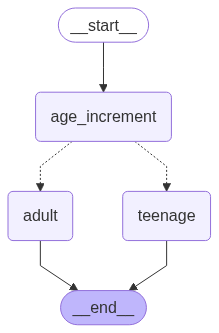

In [13]:
from langgraph.graph import StateGraph, START, END

workflow = StateGraph(User)

workflow.add_node("age_increment", age_increment)
workflow.add_node("adult", adult)
workflow.add_node("teenage", teenage)

workflow.add_edge(START, "age_increment")
workflow.add_conditional_edges("age_increment", check_age)
workflow.add_edge("adult", END)
workflow.add_edge("teenage", END)

graph = workflow.compile()

graph

In [16]:
input = {"name": "Muhammad Samar", "age": 16}
graph.invoke(input)

{'name': 'Muhammad Samar',
 'age': 17,
 'summary': 'Dear Muhammad Samar, you are a teenager now! you can have the B-Form ONLY.'}

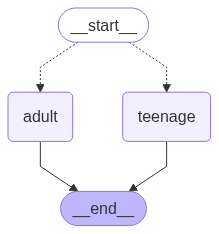

In [18]:
from typing import TypedDict, Literal
from langgraph.graph import StateGraph, START, END

class User(TypedDict):
    name: str
    age: int
    summary: str

def adult(state: User):
    return {"summary": f"Dear {state['name']}, you are an adult now! you can have the CNIC card."}

def teenage(state: User):
    return {"summary": f"Dear {state['name']}, you are a teenager now! you can have the B-Form ONLY."}

def check_age(state: User) -> Literal["adult", "teenage"]:
    return "adult" if state["age"] >= 18 else "teenage"

workflow = StateGraph(User)

workflow.add_node("adult", adult)
workflow.add_node("teenage", teenage)
workflow.set_conditional_entry_point(check_age)
workflow.add_edge("adult", END)
workflow.add_edge("teenage", END)

graph = workflow.compile()

graph

In [20]:
# Run
input = {"name": "Muhammad Samar", "age": 19}
result = graph.invoke(input)
print(result)


{'name': 'Muhammad Samar', 'age': 19, 'summary': 'Dear Muhammad Samar, you are an adult now! you can have the CNIC card.'}
